<span style='font-family:serif'>
    
# <center>$Machine   Learning   From   Scratch$</center>
    
# <center><span style='background:yellow'> Análise de Agrupamento (K-Means)</span></center>
<center>$Rafael Pavan$</center>



<span style='font-family:serif'>
    
## 1. Introdução

Algoritmos de análise de agrupamento são do tipo não-supervisionado, que possuem como característica o fato de que as observações não possuem um atributo-alvo associado. O objetivo principal de uma análise de agrupamento é subdividir os dados em subgrupos que possuam características semelhantes, denominados geralmente por $clusters$. O algoritmo mais tradicional da área é o K-Means. Este tipo de análise é muito utilizado por empresas que precisam realizar a segmentação de seus clientes com base em costumes que são comuns a um determinado grupo.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

<span style='font-family:serif'>
    
## 2. Importando e Pré-Visualizando os Dados


In [2]:
df1 = pd.read_csv('data.csv', sep=',', index_col=None)

In [3]:
df1.head()

,f1,f2
0,7.0,1.0
1,8.0,2.0
2,7.5,1.4
3,7.7,1.2
4,7.3,1.0


In [4]:
X = df1.iloc[:,:].values

print('X:', X[0:5,:])

X: [[7.  1. ]
 [8.  2. ]
 [7.5 1.4]
 [7.7 1.2]
 [7.3 1. ]]


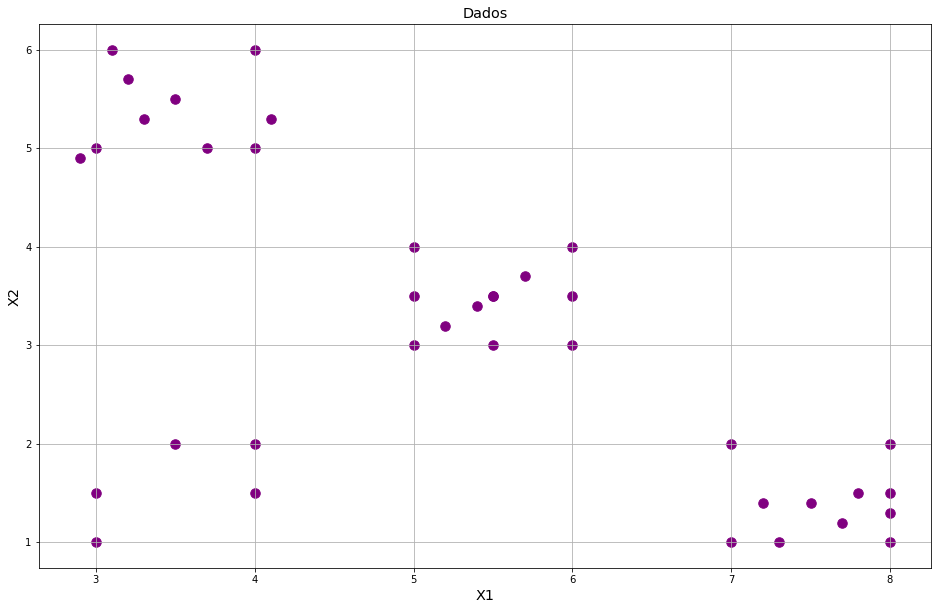

In [5]:
plt.figure(figsize=(16,10))

plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='purple', s=90) 

plt.title('Dados',fontsize='x-large')

plt.xlabel('X1',fontsize='x-large')

plt.ylabel('X2',fontsize='x-large')

plt.grid()

<span style='font-family:serif'>

No gráfico acima pode-se notar a existência de 3 "clusters": Um na diagonal superior esquerda, outro na diagonal inferior direita e um ao centro.

<span style='font-family:serif'>

## 2. Agrupamento de Dados (K-Means)

<span style='font-family:serif'>

Dado um determinado número de centróides, o algoritmo de K-Means utiliza a distância Euclidiana para encontrar quais centróides estão mais próximos das amostras dos dados. Após isto, seleciona-se o centróide com a menor distância como o representante daquela amostra.

A distância Euclidiana é dada pela equação:
    
    
$dist(x,y) = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2}$
    
Onde $x$ e $y$ são vetores que possuem a mesma dimensão ($n$).
    



In [6]:
def distancia_centroide(X,centroids):
    
    """
    Calcula o centróide mais próximo de cada uma das observações. 
    
    Entrada : Matriz de Dados (X), Matriz Centróides Iniciais (centroids).
    
    Saída:
    
    indice: um vetor que contém o índice do centróide mais próximo de cada objeto
    
    d: vetor que contém a distância entre o objeto e o centróide mais próximo.
    
    """
    
    n = X.shape[0] 
    
    K = centroids.shape[0];

    indice = np.zeros( X.shape[0], dtype=int )
    d = np.zeros( X.shape[0] )

    
    
    for linha in range(n):
        
        d[linha] = np.min(np.sqrt(np.sum((centroids-X[linha,:])**2,axis=1)))
        indice[linha] = np.argmin(np.sqrt(np.sum((centroids-X[linha,:])**2,axis=1)))
    

            
    return indice, d


In [29]:
K = 4

centroides = np.array( [[3,4],[5,1],[8,4],[5,3]])
indice, d = distancia_centroide(X, centroides)

print('Centróides Mais Próximos de Cada Observação: \n')
print(indice,'\n')

print('Distância de Cada Observação para o Centróide Mais Próximo: \n')
print(d)



Centróides Mais Próximos de Cada Observação: 

[1 2 1 1 1 2 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 1] 

Distância de Cada Observação para o Centróide Mais Próximo: 

[2.         2.         2.53179778 2.70739727 2.3        2.50798724
 2.23606798 2.23606798 3.         2.5        2.7        1.58113883
 2.23606798 1.41421356 1.         0.90553851 1.22065556 1.33416641
 1.71172428 2.00249844 1.70293864 1.         1.         0.70710678
 0.5        1.11803399 0.5        0.         1.41421356 0.70710678
 0.98994949 0.28284271 0.56568542 2.         1.41421356 2.06155281
 1.80277564 1.11803399]


<span style='font-family:serif'>

Após calcular as distâncias e designar qual centróide está mais próximo de cada amostra, deve-se atualizar o valor dos centróides com base na média das amostras anteriormente classificadas.

In [30]:
def calcula_centroides(X, indice, K):
    
    """
    Atualiza o valor dos centróides. Esta função retorna uma matriz de centróides, onde cada linha
    representa um centróide do problema.
    
    Entradas: Dados (X).
              Vetor posição de cada observação com o valor do centróide mais próximo (indice) 
    
    Saídas: Valor dos centróides atualizado(centroides).
    
    """
    
    m, n = X.shape 
    
    centroides = np.zeros([K, n])
         
    for centroid in range(K):
        
        centroides[centroid,:] = np.mean(X[np.argwhere(indice==centroid)],axis=0) 
    
    
    return centroides

centroides_atualizados = calcula_centroides(X, indice, K)

print('Centróides Atualizados:')
print(centroides_atualizados);

Centróides Atualizados:
[[3.48       5.37      ]
 [5.76666667 1.41666667]
 [7.95       1.575     ]
 [5.48333333 3.44166667]]


<span style='font-family:serif'>

Uma vez realizado este procedimento, basta agora repetí-lo por um número $x$ de iterações até que o algoritmo convirja. O algoritmo completo foi realizado abaixo:



In [31]:
def k_means(X, centroides, max_iters, historico = False):
    
    '''
    Executa o K-Means sobre a base de dados X.
    Retorna os centróides encontrados na última iteração. Retorna o vetor idx, onde cada elemento possui valor 
    entre [0..K]. 
    
    Entrada: Dados (X).
             Valores de Centróides Iniciais (centroides)
             Número Máximo de Iterações
             
    '''


    m, n = X.shape 
    K = centroides.shape[0]
    
    centroids = centroides 
    centroides_anteriores = centroids  
    
    idx = np.zeros( m ) 
    
    if historico:
        
        past = [] 
    
    for i in range(max_iters):
           
        idx, dist = distancia_centroide(X, centroids)

        if historico:
        
            past.append(centroids)
            
        centroids = calcula_centroides(X, idx, K);
        
    idx, dist = distancia_centroide(X, centroids)
    
    if historico:
        return centroids, idx, dist, past
    else:
        return centroids, idx, dist
    
centroids, idx, dist, passado = k_means(X, centroides, 100, historico = True)


In [32]:
centroids

array([[3.48      , 5.37      ],
       [3.5       , 1.6       ],
       [7.59090909, 1.39090909],
       [5.48333333, 3.44166667]])

<span style='font-family:serif'>
    
Vamos visualizar os quatro centróides (clusters) encontrados:

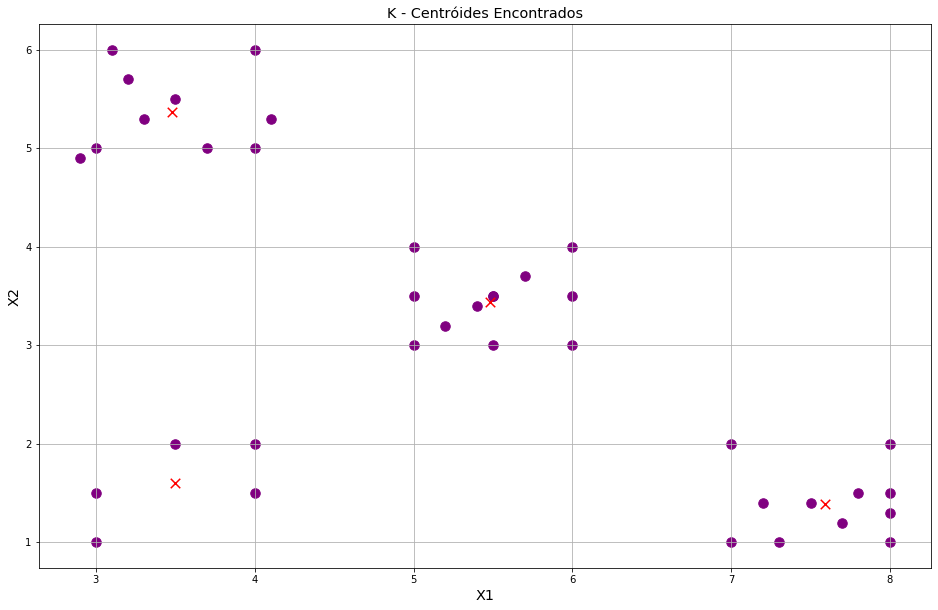

In [33]:
plt.figure(figsize=(16,10))

plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='purple', s=90) 

plt.title('K - Centróides Encontrados',fontsize='x-large')

plt.xlabel('X1',fontsize='x-large')

plt.ylabel('X2',fontsize='x-large')

plt.grid()

plt.scatter( centroids[:,0], centroids[:,1], marker='x', label = 'Centróides', color='red', s=90) 

<span style='font-family:serif'>
A cada iteração foi guardada a posição dos centróides. Graças a isso, pode-se agora plotar um a um, de modo a demarcar a trajetória percorrida do ponto inicial ao final de cada cluster. Para isso foi criada a função plota_historico.

In [34]:
def plota_historico(historico):
    
    passado=historico

    plt.figure(figsize=(16,10))

    plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='blue', s=50) 

    plt.title('K - Centróides Encontrados (Histórico de Procura)',fontsize='x-large')

    plt.xlabel('X1',fontsize='x-large')

    plt.ylabel('X2',fontsize='x-large')

    plt.grid()


    for item in range(len(passado)):

        for ponto in range( centroides.shape[0] ):

            if ponto == len(passado)-1:

                plt.scatter( passado[item][ponto,0], passado[item][ponto,1], marker='x', color='black', s=50) 

            else:

                plt.scatter( passado[item][ponto,0], passado[item][ponto,1], marker='x', color='black', s=50) 

            if item>0:

                    plt.plot([passado[item-1][ponto,0], passado[item][ponto,0]], [passado[item-1][ponto,1], passado[item][ponto,1]], color='gray', linestyle='-.')  



    plt.scatter( centroids[:,0], centroids[:,1], marker='x', label = 'Centróides', color='red', s=200) 

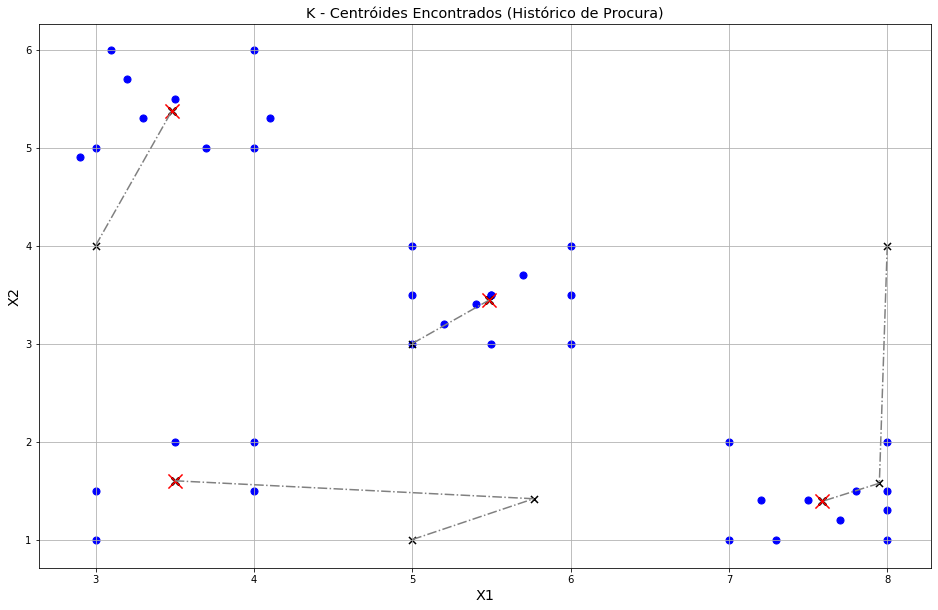

In [35]:
plota_historico(passado)

<span style='font-family:serif'>

## 3. Otimizando o Número de Centróides

<span style='font-family:serif'>

Para ajudar a determinar o número ótimo de clusters, criou-se uma função objetivo que calcula a soma ao quadrado das distâncias de cada ponto para o centróide de seu cluster, dividido pela quantidade de observações.

$$\Omega = \frac{1}{n} \sum_{i=1}^{n} (x^{(i)} - \Phi_{(i)} )^2 $$
    
Onde:
    
- $x$ : Amostra de Dados;
- $n$ : Número Total de Amostras;
- $\Omega$ : Função Objetivo;
- $\Phi$ : Cetróide Referente a Amostra;

Dessa maneira, ao rodar o algoritmo para diversos números de clusters, teremos uma métrica de quão adequada ao problema é cada quantidade de centróides. As quantidades que geram o menor valor da função objetivo, são as melhores opções "matemáticas" para solução do problema. É importante ressaltar que o problema em questão foi realizado para fins didáticos, e na vida real, na maioria dos casos uma maior quantidade de clusters vai sempre otimizar a função objetivo. Embora a matemática seja maravilhosa, o conhecimento específico dos analistas e cientistas também é muito valioso. Deve-se utilizar a ferramenta como uma forma de embasar teorias previamente criadas com base no conhecimento técnico de negócio sobre a área de estudo, não somente pelos resultados numéricos.

In [36]:
def func_objetivo(d):
    
    """"
    
    A função objetivo retorna um valor que ajuda a otimizar a quantidade de clusters. A melhor combinação de clusters
    retornará o menor valor da função objetivo.
    
    Entrada: Distância dos Clusters (d).
    Saída: Custo(c)
    
    """
    
       
    m = len(d)

    custo=np.sum(dist**2)/m
    
    return custo
    

In [60]:
vetor_de_k = np.array([1,2,3,4,6])

custos = []

for k in vetor_de_k:

    centroides = X[np.random.permutation(range(X.shape[0]))[0:k],:]
    
    centroids, idx, dist, passado = k_means(X, centroides, 50, historico = True)
    
    custos.append(func_objetivo(dist))
       

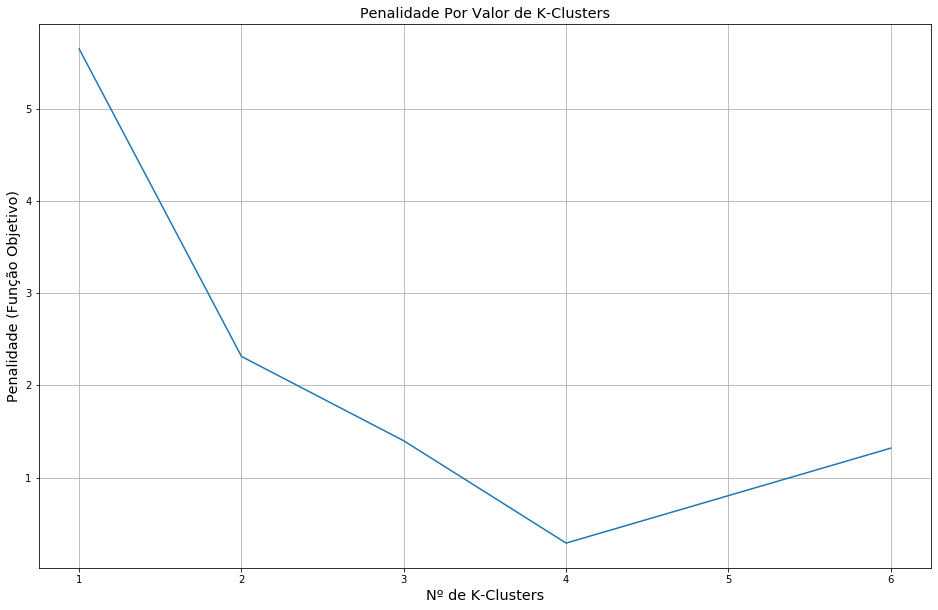

In [63]:
plt.figure(figsize=(16,10))
plt.plot(vetor_de_k,custos)
plt.title('Penalidade Por Valor de K-Clusters',fontsize='x-large')
plt.xlabel('Nº de K-Clusters',fontsize='x-large')
plt.ylabel('Penalidade (Função Objetivo)',fontsize='x-large')
plt.grid()


<span style='font-family:serif'>

Para o estudo de caso realizado, o número ótimo de clusters é 4, pois a função objetivo retorna o menor valor de penalidade. Neste caso em específico, a matemática concorda com a análise prévia realizada pela visualização da disposição das amostras no plano $R_{2}$.